nodes visited   938654169
cache space     30000034
nodes stored    30000034
nodes forgotten 573851583
current depth   0
current node    
role: min
  root: work: 264509275 pn0:    INF pn1:    INF dn0:      0 dn1:      0 

role: max
(8, 1): work:  33212588 pn0:   3541 pn1:   3516 dn0:  12740 dn1:  12742 
(6, 2): work: 146504528 pn0:    INF pn1:    INF dn0:      0 dn1:      0 
(8, 2): work:  41858311 pn0:   4879 pn1:   4488 dn0:  12496 dn1:  12496 
(7, 2): work:  42933847 pn0:   5161 pn1:   4982 dn0:  12710 dn1:  12719 

time 37970.3696612
{((1, 4), (4, 4)): 'Stephen wins', ((1, 4), (5, 3)): 'Todd wins', ((1, 4), (3, 5)): 'Todd wins', ((1, 4), (3, 3)): 'Todd wins'}


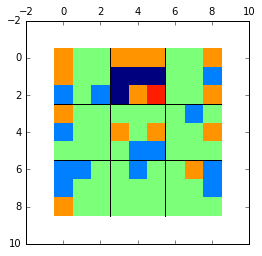

In [1]:
import sys
sys.path.append('../')

import tictactics_cython as tact
from tictactics_cython import Board
import dfpn_multi as dfpn
import matplotlib
import numpy as np
import cProfile
from matplotlib import pyplot as plt
import time
%matplotlib inline

board = np.zeros((9,9))
for x in [(0,0),(0,4),(2,4),(0,8),(2,8),(4,3),(4,5)]:
    board[x]=1
for o in [(6,0),(7,0),(5,4),(5,5),(6,4),(6,8),(7,8),]:
    board[o]=-1
big_board = np.array([[0,0,0],
                      [0,0,0],
                      [0,0,0]])

player = 1
game = Board(board=board,big_board = big_board,player = player)
for move in [(1,0),(4,0),(3,0),(2,0),(8,0),(6,1),(0,5),(1,8),(4,8),(3,7),(0,3),(2,2),(6,7)]:
    game.update_move(move)
log_len = len(game.log)
dfpn.init()

tact.fancy_board(game)
t0 = time.clock()

sols = {}
with open('Stephen.txt','a') as file_:
    file_.write('\n' + '*'*30 + '\nStarting a new run\n' + '*'*30 + '\n'*2)
for move in game.legal_moves()[1:2]:
    with open('Stephen.txt','a') as file_:
        file_.write('*'*30 + '\nmove ' + str(move) + '\n' + '*'*30 + '\n')
# for move in [(3,1)]:
    game.update_move(move)
#     game.update_move((3,0))
    for move2 in game.legal_moves():
#     for move2 in [(0,5)]:
        dfpn.init()
        game.update_move(move2)
#         game.update_move((2,2))
        node,tree = dfpn.solve(game,3,{1:0,0:1,-1:2,2:1,-2:1},0,root = True,epsilon=1.02)
        if node[2] == 0:
            node_print = 'Stephen wins'
        elif node[5] == 0:
            node_print = "Todd wins"
        elif node[3]==node[4]==0:
            node_print = 'tie'
        sols[(move,move2)]=node_print
        with open('Stephen.txt','a') as file_:
            file_.write('moves {}{} - {}\n'.format(move,move2,node_print))
        for _ in xrange(len(game.log) - log_len-1):
            game.erase_move()

    game.erase_move()
    assert(len(game.log) == log_len)
print 'time',time.clock() - t0

print sols
# print tree

In [2]:
dfpn.DEBUG

[{'pn': (3L, 2L, 2L, 2L),
  'threshholds': (1152921504606846976L, 12L, 0L, 2L),
  'where': 'outside'},
 {'GTc': [2L, 0L, 12L],
  'GWc': [3L, 0L, 1125899906842624L],
  'SLc': [2L, 1125899906842624L, 2L],
  'STc': [2L, 1125899906842624L, 0L],
  'number of children': 3,
  'pn': (1125899906842627L, 14L, 0L, 2L),
  'threshholds': (1152921504606846976L, 24L, 5L, 5L),
  'where': 'inside'},
 {'pn': (3L, 2L, 2L, 2L),
  'threshholds': (1152921504606846976L, 12L, 0L, 2L),
  'where': 'outside'},
 {'GTc': [2L, 0L, 12L],
  'GWc': [3L, 0L, 1125899906842624L],
  'SLc': [2L, 1125899906842624L, 2L],
  'STc': [2L, 1125899906842624L, 0L],
  'number of children': 3,
  'pn': (1125899906842627L, 14L, 0L, 2L),
  'threshholds': (1152921504606846976L, 24L, 5L, 5L),
  'where': 'inside'},
 {'pn': (3L, 2L, 2L, 2L),
  'threshholds': (1152921504606846976L, 12L, 0L, 2L),
  'where': 'outside'},
 {'GTc': [2L, 0L, 12L],
  'GWc': [3L, 0L, 1125899906842624L],
  'SLc': [2L, 1125899906842624L, 2L],
  'STc': [2L, 11258999068